In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [43]:
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 

In [44]:
df = pd.read_csv("titanic_toy.csv")

In [45]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [47]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [48]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [51]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [52]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [53]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [54]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
597,49.0,0.0000,0,49.0,49.000000,0.0000,0.000000
871,47.0,NaN,2,47.0,47.000000,14.4000,32.517788
783,NaN,23.4500,3,28.0,29.498846,23.4500,23.450000
760,NaN,14.5000,0,28.0,29.498846,14.5000,14.500000
645,48.0,76.7292,1,48.0,48.000000,76.7292,76.729200


In [55]:
print("original age variable variance :",X_train['Age'].var())
print("AGE variance after medain imputation :",X_train['Age_median'].var())
print("Age variance after mean imputation :",X_train['Age_mean'].var())

print("original Fare variable variance :",X_train['Fare'].var())
print("fare variance after medain imputation :",X_train['Fare_median'].var())
print("fare variance after mean imputation :",X_train['Fare_mean'].var())

original age variable variance : 210.2517072477435
AGE variance after medain imputation : 169.20731007048155
Age variance after mean imputation : 168.85193366872227
original Fare variable variance : 2761.0314349486343
fare variance after medain imputation : 2637.012481677765
fare variance after mean imputation : 2621.232374951235


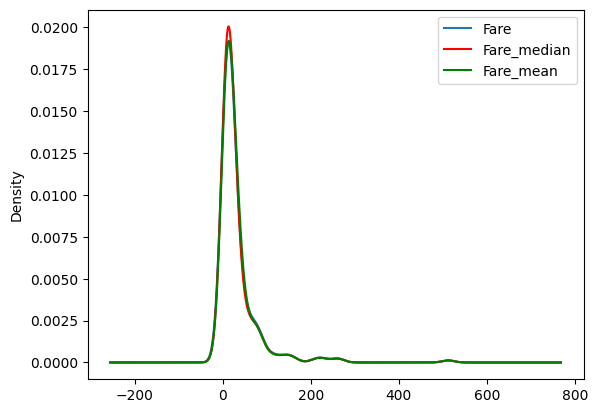

In [56]:
fig = plt.figure() 
ax = fig.add_subplot(111)

# original variable distribution 
X_train['Fare'].plot(kind='kde',ax= ax)

#variable imputer with the median 
X_train['Fare_median'].plot(kind = 'kde',ax= ax,color ='red')

#Variable  imputed with the mean 
X_train['Fare_mean'].plot(kind='kde',ax =ax,color = "green")

#add Legnds
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

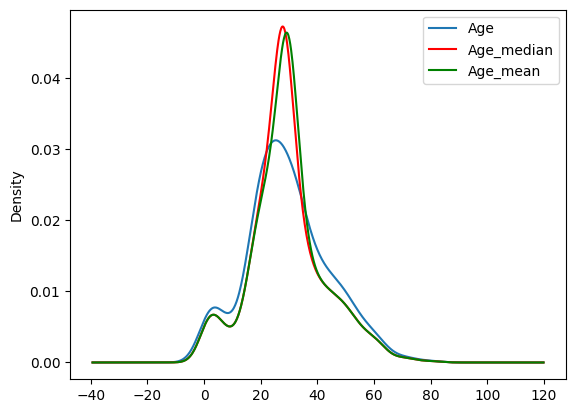

In [57]:
fig = plt.figure() 
ax = fig.add_subplot(111)

# original variable distribution 
X_train['Age'].plot(kind='kde',ax= ax)

#variable imputer with the median 
X_train['Age_median'].plot(kind = 'kde',ax= ax,color ='red')

#Variable  imputed with the mean 
X_train['Age_mean'].plot(kind='kde',ax =ax,color = "green")

#add Legnds
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [58]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


<Axes: >

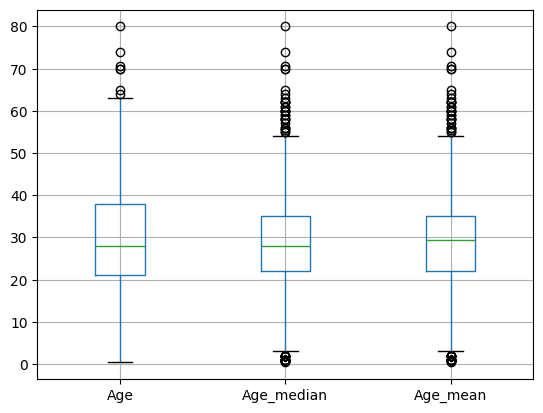

In [59]:
X_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

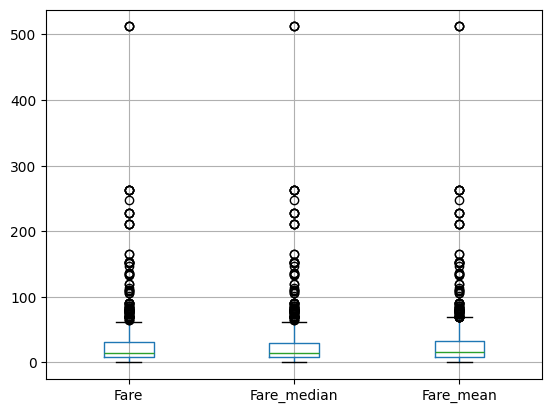

In [60]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

# Using Sklearn 

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [63]:
trf= ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [64]:
trf.fit(X_train)

C:\Users\rajna\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [65]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [66]:
trf.named_transformers_['imputer2'].statistics_trf.named_transformers_['imputer2'].statistics_trf.named_transformers_['imputer2'].statistics_trf.named_transformers_['imputer2'].statistics_trf.named_transformers_['imputer2'].statistics_trf.named_transformers_['imputer2'].statistics_

array([32.51778772])

In [67]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [68]:
X_train

array([[ 45.5       ,  28.5       ,   0.        ],
       [ 23.        ,  13.        ,   0.        ],
       [ 32.        ,   7.925     ,   0.        ],
       ...,
       [ 41.        ,  32.51778772,   2.        ],
       [ 14.        , 120.        ,   3.        ],
       [ 21.        ,  77.2875    ,   1.        ]])